In [2]:
import sys
# double check that you have a virtual env set up
!type python
sys.executable

python is /home/tynes/python/avg-basefee/bin/python


'/home/tynes/python/avg-basefee/bin/python3'

In [5]:
# install deps
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 1.5 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 657.8 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 549.8 kB/s eta 0:00:00MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 2.1 MB/s eta 0:00:00m eta 0:00:010:01
You should consider upgrading via the '/home/tynes/python/avg-basefee/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# imports
import csv
import matplotlib.pyplot as plt

# current_average = current_average * 0.7 + basefee * 0.3

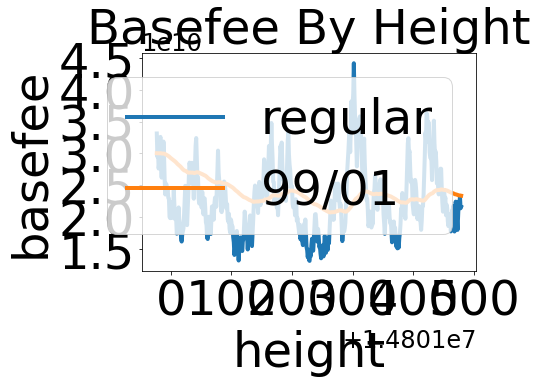

In [3]:
heights = []
basefees = []

def scale(input, a, b):
    avg = 3 * 1e10
    out = []
    for sample in input:
        avg = (avg * a) + (sample * b)
        out.append(avg)
    return out

with open('results.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for idx, row in enumerate(reader):
        if idx == 0:
            continue
        height = row[0]
        basefee = row[1]
        
        heights.append(int(height))
        basefees.append(int(basefee))

plt.rcParams["figure.figsize"] = (50,30)
plt.plot(heights, basefees, label="regular", linewidth=4)
#plt.plot(heights, scale(basefees, a=0.7, b=0.3), label="70/30", linewidth=4)
#plt.plot(heights, scale(basefees, a=0.8, b=0.2), label="80/20", linewidth=4)
#plt.plot(heights, scale(basefees, a=0.5, b=0.5), label="50/50", linewidth=4)
plt.plot(heights, scale(basefees, a=0.99, b=0.01), label="99/01", linewidth=4)
plt.title('Basefee By Height', fontsize=48)
plt.xlabel('height', fontsize=48)
plt.ylabel('basefee', fontsize=48)

ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(24)
ax.xaxis.get_offset_text().set_fontsize(24)


plt.yticks(fontsize=48)
plt.xticks(fontsize=48)
plt.legend(fontsize=48)

plt.show()

#plt.savefig("70-30.svg", format='svg')